# Python tutorial

EITN Spring School, March 19th, 2018

Bartosz Teleńczuk and OSS comunity

*e-mail*: bartosz@telenczuk.pl <br/>
*website*: http://datascience.telenczuk.pl

## Requirements

* Python 3.x
* Jupyter Notebook
* NumPy >= 1.10
* matplotlib

If you use [anaconda](https://www.continuum.io/downloads) these libaries should be already installed in your system

## Other materials

* Gaël Varoquaux, Emmanuelle Gouillart and Olav Vahtras (editors), [SciPy Lectures](http://scipy-lectures.org)
* Software Carpentry community, [Programming with Python](http://swcarpentry.github.io/python-novice-inflammation/)
* NumPy community, [NumPy Docs](http://docs.scipy.org/doc/numpy/)
* Nicolas Rougier, [100 NumPy exercises](https://github.com/rougier/numpy-100)
* Nicolas Rougier, [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/index.html)
* Bartosz Teleńczuk, [Advanced NumPy lesson](https://github.com/paris-swc/advanced-numpy-lesson)


# Basics

In [1]:
print("Hello, EITN!")

Hello, EITN!


In [2]:
a = 2 + 2
print(a)

4


In [3]:
# Tuples

a_tuple = (2, 5)
left, right = a_tuple
print(left)

2


In [4]:
## Lists

a_list = [2, 5]
a_list[0] = 3
print(a_list)

[3, 5]


In [5]:
## For loops

for i in range(3):
    print("Iteration", i)

Iteration 0
Iteration 1
Iteration 2


Note that the syntax of **for loops** differs in Python from many other languages:

* we use the keyword `range` for defining the initial value of the iteration index, its final value, and the increment
* no begin/end clauses -- for loop body is delimited by the indentation (4 spaces)

# What is NumPy?

* memory-efficient container for multi-dimensional homogeneous (mainly numerical) data (NumPy array)

* fast vectorised operations on arrays

* library general purpose functions: data reading/writing, linear algebra, FFT etc. (more scientific functions are implemented in SciPy lecture)

* main applications: signal processing, image processing, analysis of raw data from measurment instruments


## Importing NumPy

In [6]:
import numpy as np

In [7]:
new_array = np.array([1, 2, 3, 4])
print(new_array)

[1 2 3 4]


You can also create arrays of specific dimensions initialised with zeros or ones:


In [8]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [9]:
np.ones(5)

array([1., 1., 1., 1., 1.])

### Exercise

Create the following array and store in a new variable called `a`:

```
[0, 5, 8, 10]
```

## Loading data

We are studying **local field potentials** (LFP) recorded in humans. The short data segment that we are going to analyse here consists of 5 seconds of LFP recorded from 5 different channels (electrodes).

First, we will download the data from the internet. Of course, we can use Python standard library to do that:

In [38]:
from urllib.request import urlretrieve
urlretrieve('http://tinyurl.com/eitn-school-2019', 'lfp_data.csv')

('lfp_data.csv', <http.client.HTTPMessage at 0x7f001daa97f0>)

The data sets are stored in comma-separated values (CSV) format: each row holds information for a time point, and the columns represent channels. The first few rows of our first file look like this:

In [11]:
# below command works only for UNIX-based systems
!head lfp_data.csv


2.799,-2.622,3.282,5.347,14.977,-4.088,14.369,12.822,17.566,8.630
3.490,2.981,6.343,16.577,22.077,-7.614,33.572,31.573,34.571,16.949
10.835,5.919,13.634,24.452,25.687,-9.133,22.580,31.077,34.394,24.428
10.280,8.999,17.101,19.872,17.126,0.535,24.727,30.549,30.826,14.465
4.521,11.578,11.792,14.644,9.768,1.607,22.464,23.721,19.347,9.844
-4.515,3.062,11.140,7.918,8.177,-2.098,20.750,25.216,16.156,22.911
-12.754,5.800,3.569,2.479,-3.858,8.087,16.445,17.902,18.074,19.659
-25.156,3.728,-0.911,3.077,-2.544,-1.875,18.459,24.377,15.030,8.702
-34.032,3.549,2.209,7.571,-8.446,-3.040,13.981,31.504,19.831,4.144
-34.826,7.614,0.814,11.856,-4.948,-3.165,11.061,33.469,22.381,10.277


<div class="alert alert-warning">
    
**Note** If you don't have the file. You can create an artificial dataset using the following command. It won't be as interesting as the real LFP, but it will allow you to finish the exercies.

```python
data = np.random.rand(6250, 10)
t = np.arange(6250)
phases = np.random.rand(10) * np.pi * 2
data = data * 0.1 * np.sin(t[:, None] / 1250 * 5 * 2 * np.pi + phases[None, :])
```

</div>


After you have downloaded the file, you can load it using `numpy`:

In [12]:
data = np.loadtxt(fname='lfp_data.csv', delimiter=',')

## Explore array

In [13]:
print(data)

[[  2.799  -2.622   3.282 ...  12.822  17.566   8.63 ]
 [  3.49    2.981   6.343 ...  31.573  34.571  16.949]
 [ 10.835   5.919  13.634 ...  31.077  34.394  24.428]
 ...
 [ -6.06   54.613  -6.874 ... -13.708 -22.939 -43.404]
 [-11.37   54.027  -0.869 ... -13.252 -29.308 -40.092]
 [ -3.006  48.919  -4.313 ... -12.503 -34.508 -36.769]]


In [14]:
print(data.dtype)
print(data.shape)

float64
(6250, 10)


In [15]:
number_of_points, number_of_channels = data.shape
sampling_frequency = 1250
total_time = number_of_points / sampling_frequency
print(total_time, 's')

5.0 s


## Plotting

We can plot the data using `matplotlib` library:

In [16]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()

<Figure size 640x480 with 1 Axes>

**Note** If the above figure appears only after you call `plt.show()` function, in the notebook you can change this behaviour using this command:

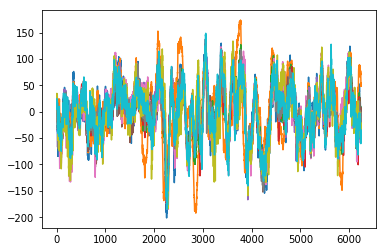

In [17]:
%matplotlib inline
plt.plot(data)

## Indexing

Like lists and tuples the NumPy arrays are zero-indexed:

In [18]:
data[0, 0]

2.799

It means that that the third element in the first row has an index of [0, 2]:

In [19]:
data[0, 2]

3.282

We can also assign the element with a new value:

In [20]:
data[0, 2] = 100.
print(data[0, 2])

100.0


NumPy (and Python in general) checks the bounds of the array:

In [21]:
print(data.shape)
#data[60000, 0]

(6250, 10)


Finally, we can ask for several elements at once:

In [22]:
data[0, [0, 9]]

array([2.799, 8.63 ])

## Slices

You can select ranges of elements using slices. To select first two columns from the first row, you can use:

In [23]:
data[0, 0:2]

array([ 2.799, -2.622])

Note that the returned array does not include third column (with index 2).

You can skip the first or last index (which means, take the values from the beginning or to the end):

In [24]:
data[0, :2]

array([ 2.799, -2.622])

If you omit both indices in the slice leaving out only the colon (`:`), you will get all columns of this row:

In [25]:
data[0, :]

array([  2.799,  -2.622, 100.   ,   5.347,  14.977,  -4.088,  14.369,
        12.822,  17.566,   8.63 ])

We can do similarly for the rows (time points)

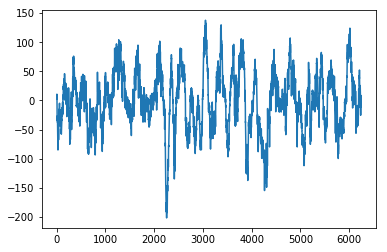

In [26]:
plt.plot(data[:, 0])

## Filtering data

It's also possible to select elements (filter) based on a condition. For example, to select all measurments above 10 in the first patient we can use:

In [27]:
single_channel = data[0, :]
single_channel[single_channel>0]

array([  2.799, 100.   ,   5.347,  14.977,  14.369,  12.822,  17.566,
         8.63 ])

We can also substitute the measurement with a new value:


In [28]:
single_channel[single_channel>0] = 0
print(single_channel)

[ 0.    -2.622  0.     0.     0.    -4.088  0.     0.     0.     0.   ]


<div class="alert alert-warning">
    
**Warning** Please note that changing `patient_data` in the previous example, will also modify the original `data` array from which the row was extracted. The reason is that taking a slice does not copy a data, only gives a new view on it. 
</div>

### Quiz 

Imagine the following array `a`:

```
>> print(a)
[0, 5, 8, 10]
```

Which of the following commands will give this output:

```
[5, 8]
```

a) `print(a[1, 2])`

b) `print(a[2:3])`

c) `print(a[1:2])`

d) `print(a[[1, 2]])`

e) `print(a[a<10])`

You can test your guess by creating the `a` array:

```
a = np.array([0, 5, 8, 10])
```

## Operations

By default additions/subtractions/etc. are elementwise:

In [29]:
doubledata = data + data
print(doubledata)

[[  0.     -5.244   0.    ...   0.      0.      0.   ]
 [  6.98    5.962  12.686 ...  63.146  69.142  33.898]
 [ 21.67   11.838  27.268 ...  62.154  68.788  48.856]
 ...
 [-12.12  109.226 -13.748 ... -27.416 -45.878 -86.808]
 [-22.74  108.054  -1.738 ... -26.504 -58.616 -80.184]
 [ -6.012  97.838  -8.626 ... -25.006 -69.016 -73.538]]


Operations by scalar:

In [30]:
tripledata = data * 3
print(tripledata)


[[   0.      -7.866    0.    ...    0.       0.       0.   ]
 [  10.47     8.943   19.029 ...   94.719  103.713   50.847]
 [  32.505   17.757   40.902 ...   93.231  103.182   73.284]
 ...
 [ -18.18   163.839  -20.622 ...  -41.124  -68.817 -130.212]
 [ -34.11   162.081   -2.607 ...  -39.756  -87.924 -120.276]
 [  -9.018  146.757  -12.939 ...  -37.509 -103.524 -110.307]]


Some functions can be applied elementwise:

In [31]:
expdata = np.exp(data)
print(expdata)

[[1.00000000e+00 7.26574026e-02 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.27859477e+01 1.97075143e+01 5.68499253e+02 ... 5.15204535e+13
  1.03274841e+15 2.29539364e+07]
 [5.07669078e+04 3.72039488e+02 8.34009440e+05 ... 3.13739799e+13
  8.65215738e+14 4.06392425e+10]
 ...
 [2.33440089e-03 5.22546015e+23 1.03433145e-03 ... 1.11350262e-06
  1.09073407e-10 1.41215480e-19]
 [1.15364381e-05 2.90822480e+23 4.19370710e-01 ... 1.75682914e-06
  1.86937885e-13 3.87494579e-18]
 [4.94892403e-02 1.75894298e+21 1.33933093e-02 ... 3.71548997e-06
  1.03125488e-15 1.07504389e-16]]


<div class="alert alert-warning">

**Warning** Standard Python installation also includes the `math` library, but it does not play nicely with NumPy array, so avoid using it with NumPy arrays.
</div>

Some functions (such as mean, max, etc.) aggregate the data return arrays of less dimensions or scalars:

In [32]:
meandata = np.mean(data)
print(meandata)

-0.3784369919999999


By default the NumPy `mean` function It's also possbile to average over a single axis:

In [33]:
np.mean(data, 0)

array([ 0.15340096,  0.88722416,  2.06206688, -1.73837248,  1.14317136,
       -3.53674784, -1.99989392,  0.02879392, -1.21101152,  0.42699856])

### Exercise: moving average

Create a new empty array  of length 50 (use `np.zeros`) Average the LFP data over the first 0.1 s of the first channel and store the value in the new array. Then repeat it for the next ten patients and so on. Plot the resulting signal. If you finished early, repeat that for other channels and plot them on a single plot.

## SciPy

* SciPy packages (stats, integrate, signal, fftpack)
* calculate power spectrum

In [34]:
from scipy import fftpack

lfp_fft = fftpack.fft(data[:, 0])

(0, 20)

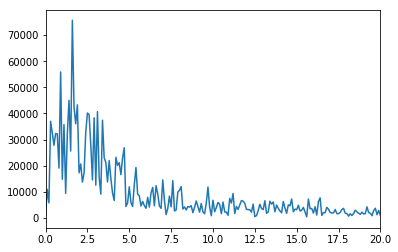

In [37]:
frequency = np.arange(len(lfp_fft)) / len(lfp_fft) * sampling_frequency / 2
plt.plot(frequency, np.abs(lfp_fft))
plt.xlim(0, 20)

**Exercise** Calculate the spectrum for every channel and average the spectra.

In [4]:
from matplotlib import pylab

In [5]:
pylab.psd?